In [ ]:
# common packages
import numpy as np
import os
import sys
from typing import List

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# reading in dicom files
import pydicom

# ipywidgets for some interactive plots
from ipywidgets.widgets import * 
import ipywidgets as widgets

# skimage image processing packages
from skimage import measure, morphology

import cv2

## Load Dicom files and return list of slices of type pydicom.Filedataset

In [394]:
def load_scan(dicom_files_path: str) -> List[pydicom.FileDataset]:
    slices = [pydicom.dcmread(dicom_files_path + '/' + s) for s in
              os.listdir(dicom_files_path)]
    # Sort with Acquisition Number
    slices.sort(key = lambda x: int(x.AcquisitionNumber))

    return slices

## Vorbereitung der Bilder (Rotieren, eigene Liste

In [395]:
def preprocess_scans(scans: List[pydicom.FileDataset]) -> np.ndarray:
    # Rotate images by 180 degree
    images = np.stack([np.rot90(s.pixel_array,2) for s in scans])

    print(images.shape)

    # Substance 	HU
    # Air 	-1000
    # Fat 	-120
    # Water 	0
    # Muscle 	+40
    # Contrast 	+130
    # Bone 	+400 or more

    return np.array(images, dtype=np.int16)

## Run Methods und zeige Bild 150 an

(384, 256, 256)
(384, 256, 256)


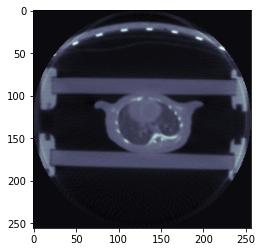

In [396]:
# set path and load files
path_of_dicom_dir = '../data/'
patient_dicom = load_scan(path_of_dicom_dir)
patient_pixels = preprocess_scans(patient_dicom)
patient_pixels_cut = preprocess_scans(patient_dicom)
#sanity check
plt.imshow(patient_pixels[150], cmap=plt.cm.bone)

## Zeige 9 Bilder des Datensets

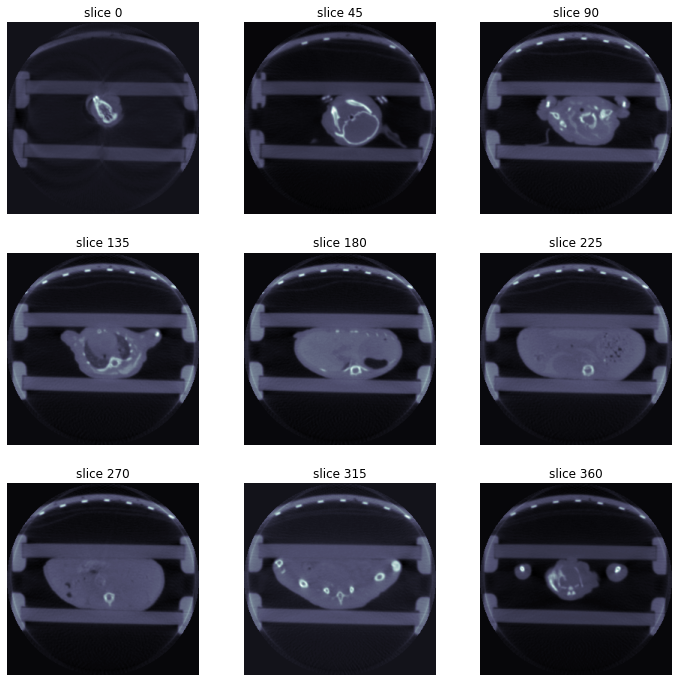

In [392]:
def sample_stack(stack, rows=3, cols=3, start_with=0, show_every=45):
    fig,ax = plt.subplots(rows,cols,figsize=[12,12])
    for i in range(rows*cols):
        ind = start_with + i*show_every
        ax[int(i/rows),int(i % rows)].set_title('slice %d' % ind)
        ax[int(i/rows),int(i % rows)].imshow(stack[ind],cmap='bone')
        ax[int(i/rows),int(i % rows)].axis('off')
    plt.show()

sample_stack(patient_pixels)

## Histogramm anzeigen

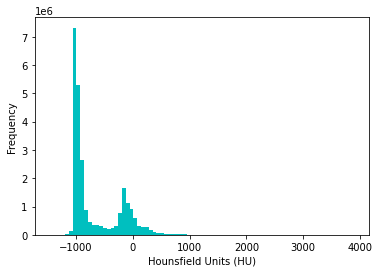

In [379]:
def plot_histogram():
    plt.hist(patient_pixels.flatten(), bins=80, color='c')
    plt.xlabel("Hounsfield Units (HU)")
    plt.ylabel("Frequency")
    plt.show()
    
plot_histogram()

## Interaktive Slice Bar um alle Bilder anzuschauen

In [380]:
plt.figure(1)
def dicom_animation(x):
    plt.imshow(patient_pixels[x])
    return x
interact(dicom_animation, x=(0, len(patient_pixels)-1))

<Figure size 432x288 with 0 Axes>

interactive(children=(IntSlider(value=191, description='x', max=383), Output()), _dom_classes=('widget-interac…

<function __main__.dicom_animation(x)>

## Plot 3D Wireframe with  (TH=950, alpha=0.2, color=white->blue)

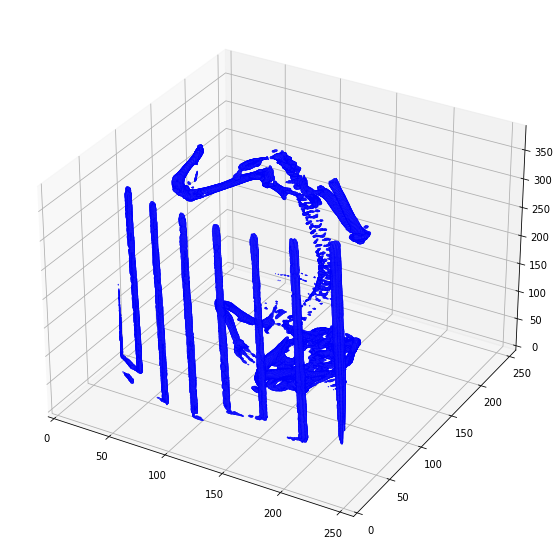

In [381]:
def plot_3d(image, threshold=950):
    
    # Position the scan upright, 
    # so the head of the patient would be at the top facing the   
    # camera
    p = image.transpose(2,1,0)
    
    verts, faces, _, _ = measure.marching_cubes(p, threshold)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    # Fancy indexing: `verts[faces]` to generate a collection of    
    # triangles
    mesh = Poly3DCollection(verts[faces], alpha=0.20)
    face_color = [1, 1, 1] # white
    edge_color = [0, 0, 1] # blue
    mesh.set_facecolor(face_color)
    mesh.set_edgecolor(edge_color)
    ax.add_collection3d(mesh)
    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])
    plt.show()
# run visualization 
plot_3d(patient_pixels)

## Plot 3d Wireframe (TH=700, alpha=0.2, color=white->blue)

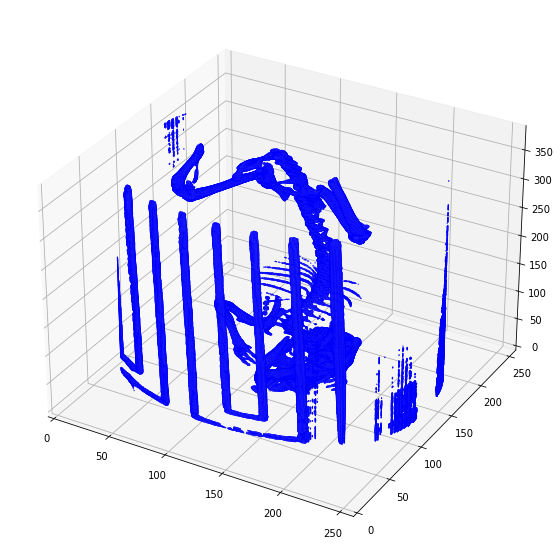

In [382]:
def plot_3d(image, threshold=700):
    
    # Position the scan upright, 
    # so the head of the patient would be at the top facing the   
    # camera
    p = image.transpose(2,1,0)
    
    verts, faces, _, _ = measure.marching_cubes(p, threshold)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    # Fancy indexing: `verts[faces]` to generate a collection of    
    # triangles
    mesh = Poly3DCollection(verts[faces], alpha=0.20)
    face_color = [1, 1, 1] # white
    edge_color = [0, 0, 1] # blue
    mesh.set_facecolor(face_color)
    mesh.set_edgecolor(edge_color)
    ax.add_collection3d(mesh)
    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])
    plt.show()
# run visualization 
plot_3d(patient_pixels)

## Plot 3D Wireframe (TH=0, alpha=0.1, color=green->None)

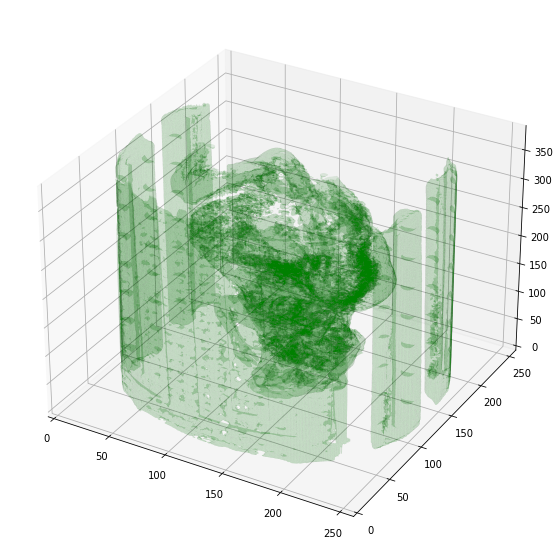

In [383]:
def plot_3d(image, threshold=0):
    
    # Position the scan upright, 
    # so the head of the patient would be at the top facing the   
    # camera
    p = image.transpose(2,1,0)
    
    verts, faces, _, _ = measure.marching_cubes(p, threshold)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    # Fancy indexing: `verts[faces]` to generate a collection of    
    # triangles
    mesh = Poly3DCollection(verts[faces], alpha=0.10)
    face_color = [0, 0.5, 0]
    mesh.set_facecolor(face_color)
    mesh.set_edgecolor(None)
    ax.add_collection3d(mesh)
    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])
    plt.show()
# run visualization 
plot_3d(patient_pixels)

## Plot 3D Wireframe (TH=600, alpha=0.2, facecolor=green)

In [ ]:
def plot_3d(image, threshold=600):
    
    # Position the scan upright, 
    # so the head of the patient would be at the top facing the   
    # camera
    p = image.transpose(2,1,0)
    
    verts, faces, _, _ = measure.marching_cubes(p, threshold)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    # Fancy indexing: `verts[faces]` to generate a collection of    
    # triangles
    mesh = Poly3DCollection(verts[faces], alpha=0.10)
    face_color = [0, 0.5, 0]
    # mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)
    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])
    plt.show()
# run visualization 
plot_3d(patient_pixels)

## Interactive 3D Wireframe with SimpleITK

In [384]:
import SimpleITK as sitk
import itkwidgets

# Get the DICOM file names in the current directory
names = sitk.ImageSeriesReader.GetGDCMSeriesFileNames('../data/')

# Read the DICOM series
reader = sitk.ImageSeriesReader()
reader.SetFileNames(names)
img = reader.Execute()

print(type(img))

itkwidgets.view(img)

<class 'SimpleITK.SimpleITK.Image'>


Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageSS3; pr…

In [391]:
import ipyvolume as ipv

ipv.figure()
ipv.scatter(patient_pixels[0], patient_pixels[1], patient_pixels[2], color='blue', marker='sphere', size=15)
ipv.show()

## Segmentation der Lunge

In [385]:
def largest_label_volume(im, bg=-1):
    vals, counts = np.unique(im, return_counts=True)

    counts = counts[vals != bg]
    vals = vals[vals != bg]

    if len(counts) > 0:
        return vals[np.argmax(counts)]
    else:
        return None

def segment_lung_mask(image):
    
    # not actually binary, but 1 and 2. 
    # 0 is treated as background, which we do not want
    binary_image = np.array(image > -320, dtype=np.int8)+1
    labels = measure.label(binary_image)
    # Pick the pixel in the very corner to determine which label is air.
    background_label = labels[0,0,0]
    #Fill the air around the person
    binary_image[background_label == labels] = 2
    
    binary_image -= 1 #Make the image actual binary
    binary_image = 1-binary_image # Invert it, lungs are now 1
    
    # Remove other air pockets insided body
    labels = measure.label(binary_image, background=0)
    l_max = largest_label_volume(labels, bg=0)
    if l_max is not None: # There are air pockets
        binary_image[labels != l_max] = 0
 
    return binary_image

In [386]:
segmented_lungs = segment_lung_mask(patient_pixels)

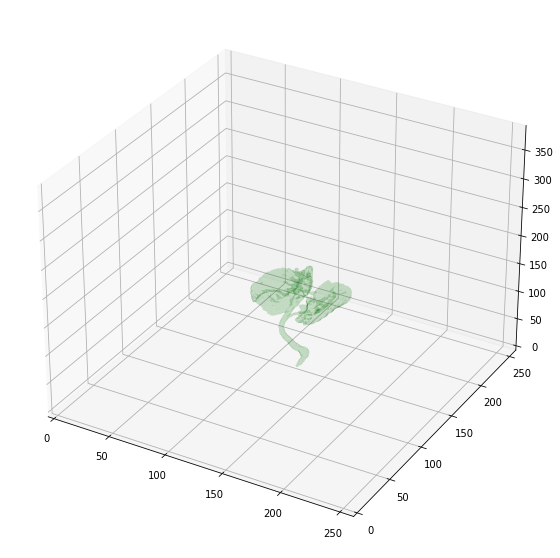

In [387]:
plot_3d(segmented_lungs, 0)

## Maus ausschneiden um Halterungskäfig von den Bilddaten zu eliminieren

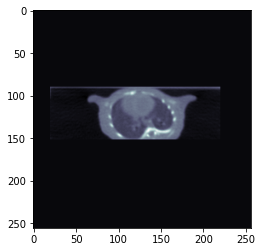

In [400]:
# Crop image

def crop_center(img,cropx,cropy):
    y,x = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return img[starty:starty+cropy,startx:startx+cropx]


for i, img in enumerate(patient_pixels):
    if(i == 0):
        plt.imshow(patient_pixels[i], cmap=plt.cm.bone)
    cropped_img = crop_center(patient_pixels[i], 200, 62)
    # Create image with shape of image and filled with HU = -1000
    hu_value = -1000
    result = np.full((256,256), hu_value, dtype=np.uint16)
    
    
    result[90:152, 20:220] = cropped_img
    patient_pixels_cut[i] = result
    
    if(i == 150):
        plt.imshow(patient_pixels_cut[i], cmap=plt.cm.bone)
    
# plt.imshow(patient_pixels[1], cmap=plt.cm.bone)

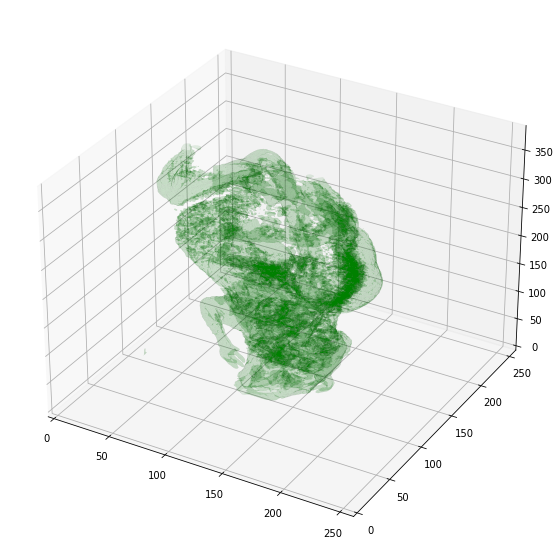

In [389]:
def plot_3d(image, threshold=0):
    
    # Position the scan upright, 
    # so the head of the patient would be at the top facing the   
    # camera
    p = image.transpose(2,1,0)
    
    verts, faces, _, _ = measure.marching_cubes(p, threshold)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    # Fancy indexing: `verts[faces]` to generate a collection of    
    # triangles
    mesh = Poly3DCollection(verts[faces], alpha=0.10)
    face_color = [0, 0.5, 0]
    mesh.set_facecolor(face_color)
    mesh.set_edgecolor(None)
    ax.add_collection3d(mesh)
    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])
    plt.show()
# run visualization 
plot_3d(patient_pixels_cut)

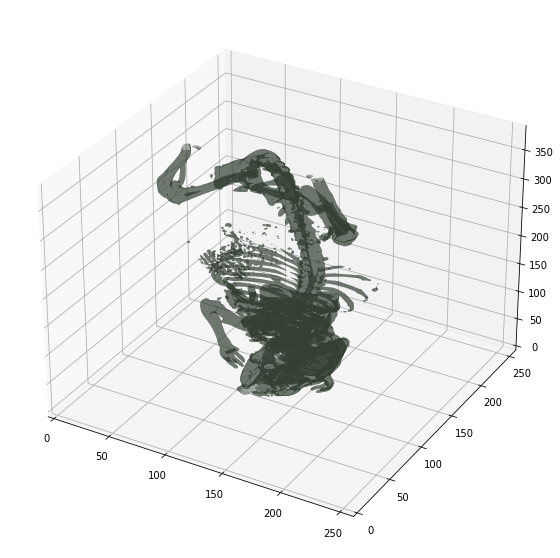

In [390]:
def plot_3d(image, threshold=130):
    
    # Position the scan upright, 
    # so the head of the patient would be at the top facing the   
    # camera
    p = image.transpose(2,1,0)
    
    verts, faces, _, _ = measure.marching_cubes(p, threshold)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    # Fancy indexing: `verts[faces]` to generate a collection of    
    # triangles
    mesh = Poly3DCollection(verts[faces], alpha=0.50)
    face_color = [0.2, 0.25, 0.2]
    mesh.set_facecolor(face_color)
    mesh.set_edgecolor(None)
    ax.add_collection3d(mesh)
    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])
    plt.show()
# run visualization 
plot_3d(patient_pixels_cut)

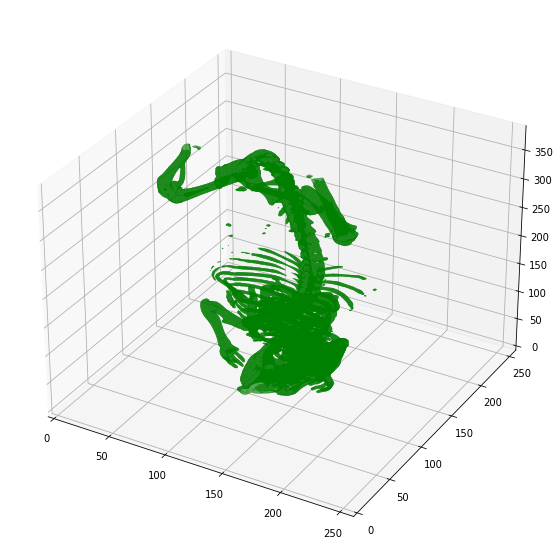

In [401]:
def plot_3d(image, threshold=200):
    
    # Position the scan upright, 
    # so the head of the patient would be at the top facing the   
    # camera
    p = image.transpose(2,1,0)
    
    verts, faces, _, _ = measure.marching_cubes(p, threshold)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    # Fancy indexing: `verts[faces]` to generate a collection of    
    # triangles
    mesh = Poly3DCollection(verts[faces], alpha=0.90)
    face_color = [0, 0.5, 0]
    mesh.set_facecolor(face_color)
    mesh.set_edgecolor(None)
    ax.add_collection3d(mesh)
    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])
    plt.show()
# run visualization 
plot_3d(patient_pixels_cut)

In [ ]:
img = np.uint8(patient_pixels[0])
# gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(img, 50, 200)
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=5, maxLineGap=50)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 3)

cv2.imshow("Result Image", img)

In [ ]:
import SimpleITK as sitk
import itkwidgets

#Canny Edge Detector 
canny = sitk.CannyEdgeDetectionImageFilter()
img = canny.Execute()